# 6.5 Unsupervised Machine Learning - Clustering

### Content List:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

#Remove scientific notation
pd.options.display.float_format='{:.4f}'.format

In [2]:
%matplotlib inline

In [3]:
#Create data path
path = r'C:\Users\Utilizador\OneDrive\Documents\CareerFoundry - Data Analyst\Data Immersion\A6\24-03-2024 TransferMarkt'

In [4]:
#import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'big5_player_list.csv'), index_col=False)

In [5]:
df.shape

(2431, 8)

In [6]:
df.head()

,Unnamed: 0,unique_id,player_name,age,country_of_citizenship,current_club_country,market_value_in_eur,highest_market_value_in_eur
0,0,0,Henrikh Mkhitaryan,35,Armenia,Italy,6000000,37000000
1,2,1,Lukas Hradecky,34,Finland,Germany,2500000,12000000
2,3,2,Frederik Rönnow,31,Denmark,Germany,5500000,5500000
3,4,3,Thomas Foket,29,Belgium,France,7000000,7000000
4,10,4,Rémy Cabella,34,France,France,4000000,14000000


In [7]:
#Delete columns not necessary for anaysis
big5_df = df.drop (columns = [ 'Unnamed: 0','unique_id','player_name','country_of_citizenship','current_club_country'])

In [8]:
big5_df.columns

Index(['age', 'market_value_in_eur', 'highest_market_value_in_eur'], dtype='object')

In [9]:
big5_df.head()

,age,market_value_in_eur,highest_market_value_in_eur
0,35,6000000,37000000
1,34,2500000,12000000
2,31,5500000,5500000
3,29,7000000,7000000
4,34,4000000,14000000


### 2. The elbow technique

In [10]:
num_cl = range(1, 11) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(big5_df).score(big5_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Utilizador\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Utilizador\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Utilizador\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Utilizador\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

[-1.9397835601445379e+18,
 -7.996054594216255e+17,
 -4.916880771503693e+17,
 -3.618373707951689e+17,
 -2.896149587728215e+17,
 -2.3472365399256666e+17,
 -1.9736482501372278e+17,
 -1.6591368225890678e+17,
 -1.4366654577638016e+17,
 -1.2476186631679013e+17]

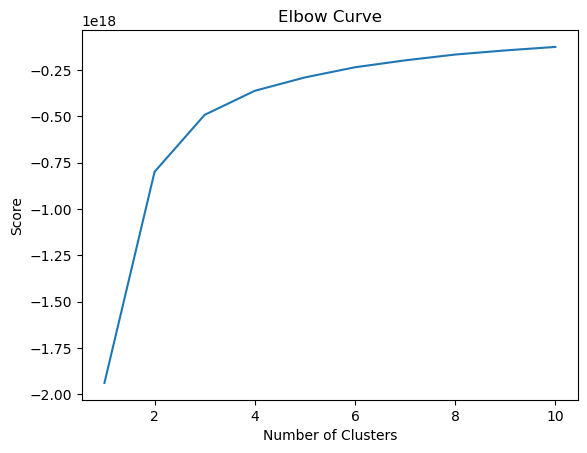

In [12]:
# Plot the elbow curve using PyLab.
num_cl = range(1, 11)  # Adjust the range to include 10 clusters
pl.plot(num_cl, score[:10])  # Use only the first 10 elements of score
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The optimal count for my cluster is three because the curve starts to strighen out ater three

### 3. k-means clustering

In [13]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3, n_init=10) 

In [14]:
kmeans.fit(big5_df)

KMeans(n_clusters=3, n_init=10)

In [15]:
big5_df['clusters'] = kmeans.fit_predict(big5_df)

In [16]:
big5_df.head()

,age,market_value_in_eur,highest_market_value_in_eur,clusters
0,35,6000000,37000000,1
1,34,2500000,12000000,0
2,31,5500000,5500000,0
3,29,7000000,7000000,0
4,34,4000000,14000000,0


In [17]:
big5_df['clusters'].value_counts()

clusters
0    1846
1     485
2     100
Name: count, dtype: int64

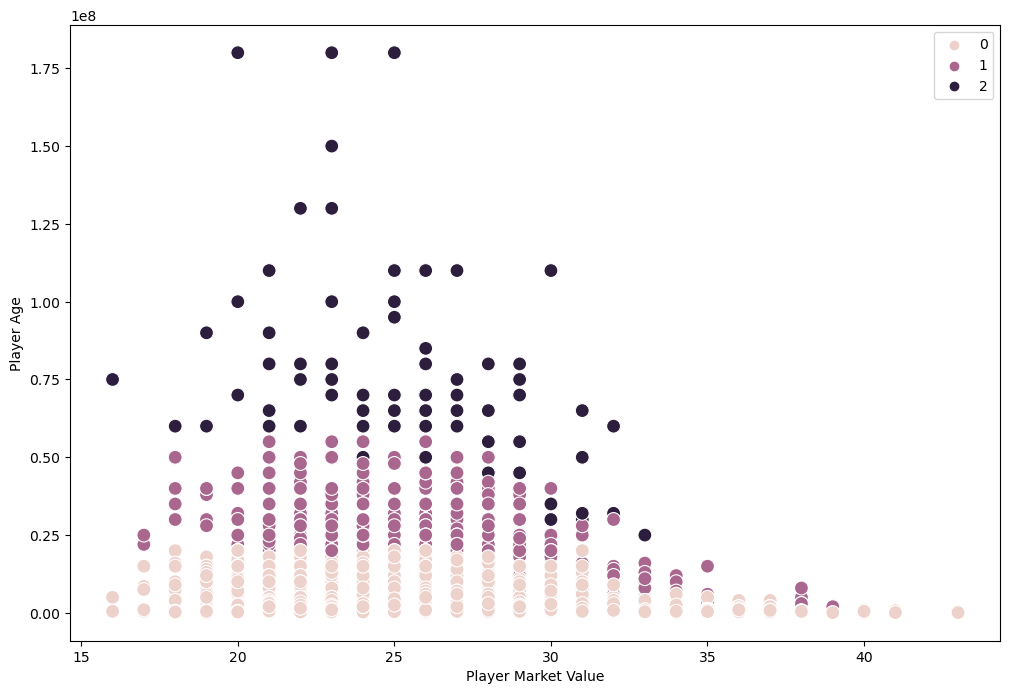

In [23]:
# Plot the clusters for the 'Player Market Value' and 'Player Age' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=big5_df['age'], y=df['market_value_in_eur'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Player Market Value')
plt.ylabel('Player Age')
plt.show()

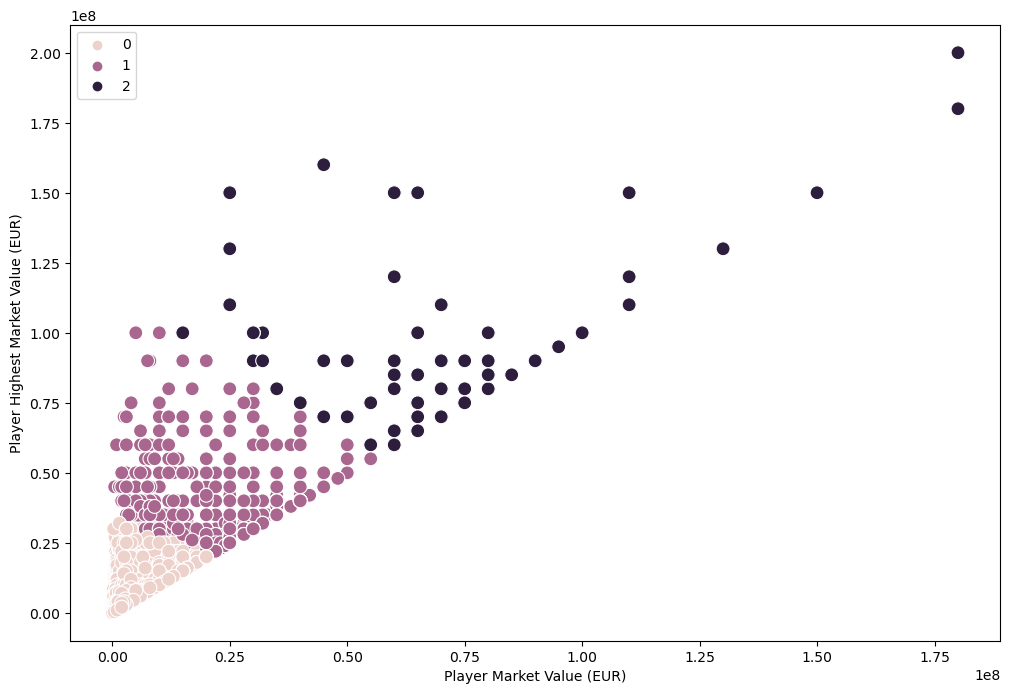

In [19]:
# Plot the clusters for the 'Player Market Value (EUR)' and 'Player Highest Market Value (EUR)' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=big5_df['market_value_in_eur'], y=df['highest_market_value_in_eur'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Player Market Value (EUR)')
plt.ylabel('Player Highest Market Value (EUR)')
plt.show()

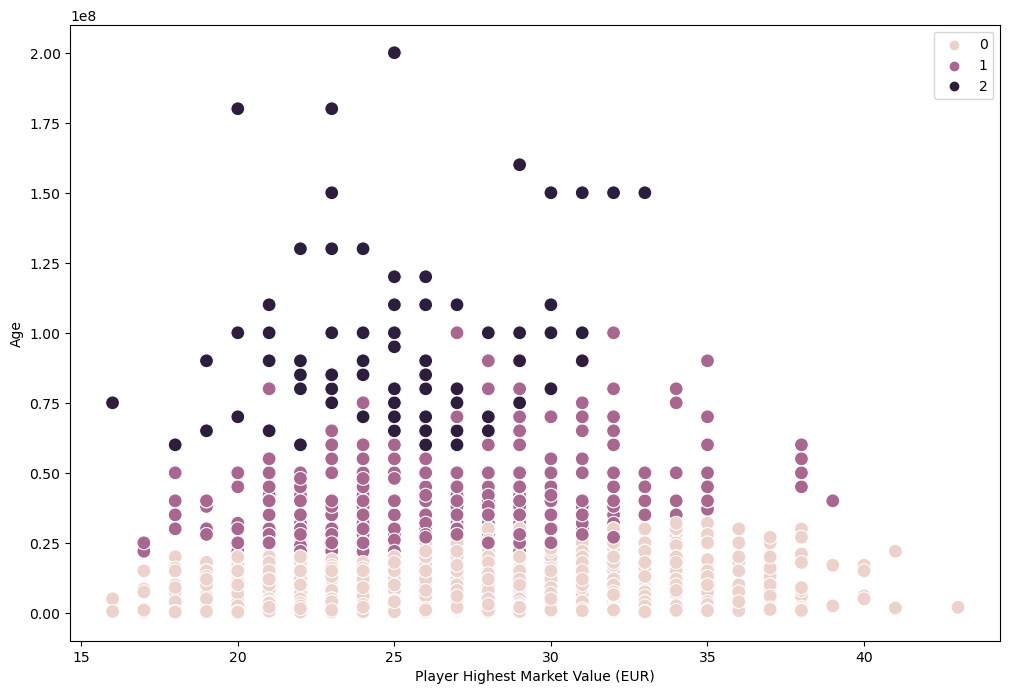

In [22]:
# Plot the clusters for the 'Player Highest Market Value (EUR)' and 'Player Age' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=big5_df['age'], y=df['highest_market_value_in_eur'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Player Highest Market Value (EUR)')
plt.ylabel('Age')
plt.show()

In [26]:
big5_df.groupby('clusters').agg({'age':['mean', 'median', 'min','max'], 
                         'market_value_in_eur':['mean', 'median', 'min','max'],})

age                 market_value_in_eur                          \
            mean  median min max                mean        median       min   
clusters                                                                       
0        26.3787 26.0000  16  43        5286416.5764  3500000.0000     50000   
1        26.4536 26.0000  17  39       24638969.0722 25000000.0000    500000   
2        25.2900 25.0000  16  33       72340000.0000 70000000.0000  15000000   

                     
                max  
clusters             
0          20000000  
1          55000000  
2         180000000

Refering to the (age & market_value_in_eur) plot and above summary stat table:
Cluster 0 shows players in the early phase of their career (from age 16) to climax of their career (age 26 to 29) in an upward movement of the market value from 50000 to 20000000; & also players in the end phase of their career (from 30 to age 43) in a downward movement of their market value from 32000000 to 100000 as their career ends. 

Cluster 1 shows a similar trend to cluster 0 with players who are of a higher value than cluster 0 between the ages 17 and 39 with an average market value of 24638969 (min = 50000 and max=55000000)

Cluster 2 shows players who are of the highest value between the ages 16 and 33 with an average market value of 72340000 (min=15000000 & max= 180000000) This cluster is a bit more scattered and without a determinable trend, The maximum and minimum market values are 41% more than cluster 0 and cluster 1 combined. 